## *ESTUDO DIRIGIDO - CONTROLE E AUTOMAÇÃO 2025.2*
### Livro texto da disciplina: Sistemas de Controle Modernos - 8a Edição


Aluno: João Marcos Amorim de Almeida

# Capítulo 13: Sistemas de controle digital

Um computador digital pode atuar como compensador ou controlador em sistemas de controle com retroação. Como o computador processa dados apenas em intervalos específicos, é necessário desenvolver métodos para descrever e analisar o desempenho desses sistemas, que operam com sinais amostrados em séries temporais.

## Introdução
O uso de computadores digitais como controladores cresceu significativamente nas últimas décadas. Esses sistemas, capazes de receber e processar múltiplas entradas, são frequentemente multivariáveis. Diferente dos sinais contínuos, os computadores digitais operam com sinais numéricos, processando entradas e fornecendo saídas em formato digital. Isso permite o controle preciso de processos por meio de sistemas de controle digital.

Aplicações de Sistemas de Controle com Computador Digital
O número de sistemas de controle por computador na indústria aumentou drasticamente nas últimas três décadas, chegando a cerca de 100 milhões de sistemas instalados. Desses, aproximadamente 20 milhões são sistemas complexos, como os usados no controle de processos químicos ou aeronáuticos. A capacidade desses sistemas varia conforme o tamanho, velocidade e potência da unidade central de processamento (CPU), bem como da organização e capacidade da memória.

Simulações e Exemplos - Capítulo 13

In [6]:
import numpy as np
from scipy.signal import dlti, dstep
import matplotlib.pyplot as plt
import control as ctrl

/usr/local/lib/python3.12/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


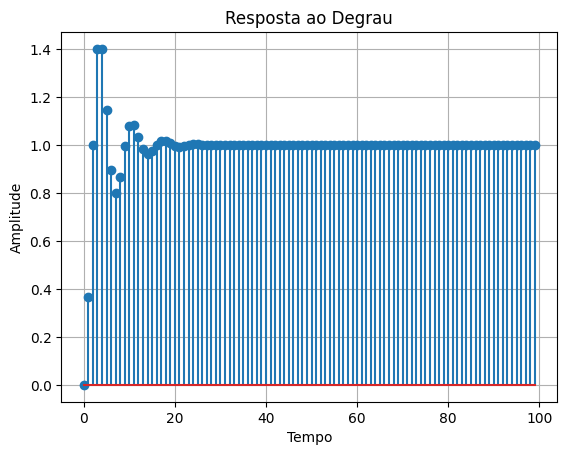

In [2]:
# Definindo numerador e denominador
num = [0, 0.3678, 0.2644]
den = [1, -1, 0.6322]

# Criando o sistema discreto
system = dlti(num, den)

# Calculando a resposta ao degrau
t, y = dstep(system)

# Convertendo a lista de arrays em um array do numpy
y = np.squeeze(y)

# Plotando a resposta ao degrau
plt.stem(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau')
plt.grid(True)
plt.show()


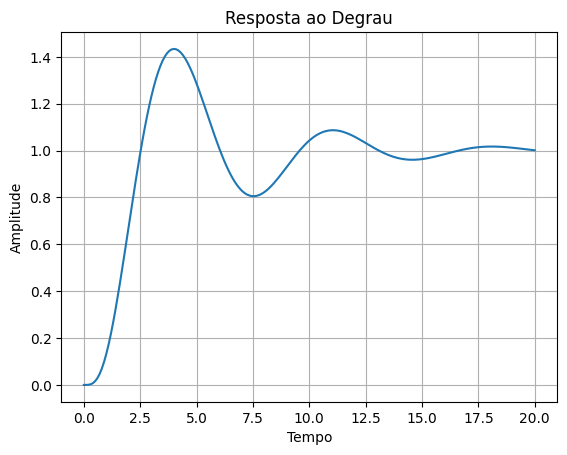

In [7]:
# Definindo numerador e denominador
numg = [1]
deng = [1, 1, 0]

# Aproximação de Padé usando a biblioteca control
num_pade, den_pade = ctrl.pade(1, 2)

# Calculando numd e dend
numd = np.subtract(den_pade, num_pade)
dend = np.convolve([1, 0], den_pade)

# Criando a função de transferência
G1 = ctrl.TransferFunction(numd, dend)
G2 = ctrl.TransferFunction(numg, deng)

# Série de funções de transferência
G_series = G1 * G2

# Função de transferência em malha fechada
G_cloop = ctrl.feedback(G_series, 1)

# Vetor de tempo
t = np.arange(0, 20.1, 0.1)

# Resposta ao degrau
t, y = ctrl.step_response(G_cloop, T=t)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


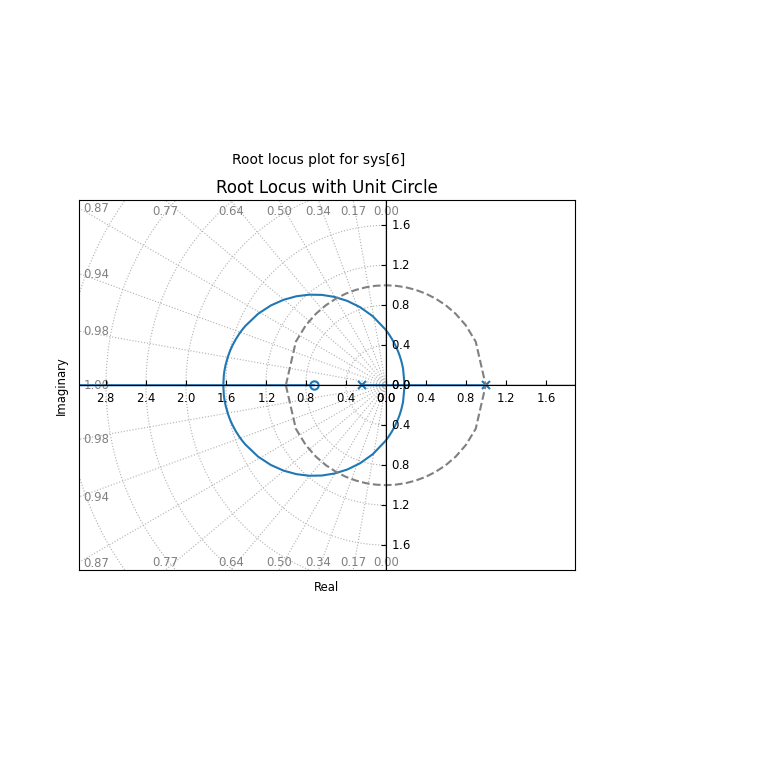

In [8]:
# Definindo numerador e denominador
num = [0.3678, 0.2644]
den = [1.000, -0.7600, -0.2400]

# Plotando o lugar das raízes
rlocus_data = ctrl.root_locus(ctrl.TransferFunction(num, den), plot=True)
plt.grid(True)

# Plotando o círculo unitário
x = np.arange(-1, 1.1, 0.1)
y = np.sqrt(1 - x**2)
plt.plot(x, y, '--', color='gray')
plt.plot(x, -y, '--', color='gray')

# Exibindo o gráfico
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Root Locus with Unit Circle')
plt.show()
